<a href="https://colab.research.google.com/github/olinyoder2534/TensorflowPractice/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [25]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
y_train.shape

(50000, 1)

In [28]:
print(X_train[:3])
print(X_test[:3])
print(y_train[:3])
print(y_test[:3])

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [29]:
X_train = X_train/255

In [30]:
X_test = X_test/255

In [31]:
X_train.dtype

dtype('float64')

In [32]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [33]:
#number for corresponding image
images = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

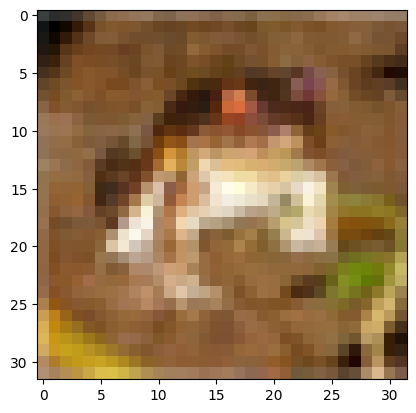

In [34]:
plt.imshow(X_train[0])

In [35]:
print(y_train[0])
print(images[6])

6
frog


ANN

In [36]:
32*32*3

3072

In [ ]:
#Takes a long time to run
#ann = models.Sequential([
        #layers.Flatten(input_shape=(32,32,3)),
        #layers.Dense(3072, activation='relu'),
        #layers.Dense(1536, activation='relu'),
        #layers.Dense(10, activation='softmax')
    #])

#ann.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              #metrics=['accuracy'])

#ann.fit(X_train, y_train, epochs=10)

CNN

In [37]:
cnn = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.4927 - accuracy: 0.4632
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1481 - accuracy: 0.5946
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0267 - accuracy: 0.6421
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9484 - accuracy: 0.6709
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8882 - accuracy: 0.6931
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8417 - accuracy: 0.7077
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7990 - accuracy: 0.7235
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7606 - accuracy: 0.7332
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7300 - accuracy: 0.7483
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [38]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9048 - accuracy: 0.6987


[0.9048252105712891, 0.6987000107765198]

In [40]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 5s 14ms/step


In [46]:
image_preds = [np.argmax(i) for i in predictions]

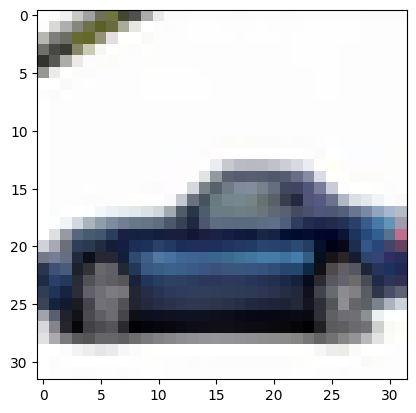

In [48]:
plt.imshow(X_test[105])

In [49]:
images[image_preds[105]]

'automobile'